In [1]:
%%HTML
<link rel="stylesheet" href="rise.css">

<font size="5"> <span style="color:green"> Preambule: Data assimilation, machine learning and dynamical systems </span> </font>

The goal of this lecture is to give a brief and very limited introduction to the realm of __machine__ and __deep leaning__. This introduction, however, remains within the scope of recent developments of __data assimilation__ techiques. Machine learning has found many new convincing applications over the past recent years, besides vision or natural language. The geosciences are among them. Even within the geosciences, there is a considerable range of potential applications of machine learning and deep learning; some of them have been evidenced recently [1]. Here we will only learn some of the key ideas when using __artificial neural networks__ (NNs) to extend the playground of data assimilation techniques.

* [1] M. Reichstein, G. Camps-Valls, B. Stevens, J. Denzler, N Carvalhais, and Prabhat. 2019. Deep learning and process understanding for data-driven Earth system science. Nature 566, (2019), 195–204. https://doi.org/10.1038/s41586-019-0912-1

# <span style="color:teal"> Data assimilation, machine learning and dynamical systems - Part I </span>
#### Marc Bocquet¹ [marc.bocquet@enpc.fr](mailto:marc.bocquet@enpc.fr) and Alban Farchi¹ [alban.farchi@enpc.fr](mailto:alban.farchi@enpc.fr)
#### (1) CEREA, École des Ponts and EdF R&D, IPSL, Île-de-France, France

During this session, we will discover some connections between data assimilation and deep learning when applied to dynamical systems.

Our specific goal will be to not only learn the state of a physical system through its observation and a prior of this state but also its dynamics. This contrasts with traditional data assimilation where the model is usually assumed to be known. Hence, the method is qualifed as __data-driven__ since _both the state and the model_, are meant to be discovered through the observations _only_.

Note that machine learning usually seeks to find a good statistical model to explain a set of data and potentially extrapolate to new data. This goal is very close to that of data assimilation. However, data assimilation, at least in the geosciences, exploits large and computationally challenging though known models. On the contrary, machine learning aims at building fast models. Note that both disciplines make use of a large amount of data. 

## <span style="color:green"> Links between data assimilation and machine learning </span>

### The Bayesian approach to data assimilation (reminder)

Recall that the analysis performed in data assimilation can most of the time be seen as an inference using an approximation of Bayes' rule which has been discussed in Chapter 4 of the lecture notes of this course. Bayes' rule reads
$$
p_{X|Y}(\mathbf{x}|\mathbf{y})= p_{Y|X}(\mathbf{y}|\mathbf{x}) \frac{p_X(\mathbf{x})}{p_Y(\mathbf{y})},
$$
where $p_{X|Y}$ is the conditional probability density function (pdf), i.e. the _ultimate pdf_ in data assimilation and more generally inference; $p_{Y|X}$ is the __likelihood__, $p_X$ is the __prior__ and $p_Y$ is the __evidence__, a constant as far as $X$ is concerned. 

This is a remarkably elegant and powerful formula. However, since it is also too general, it is often very difficult to implement and almost systematically calls for approximations.

In Chapter 4 of these lecture notes, we assumed Gaussian statistics for the observation likelihood
$$
p_{Y|X}(\mathbf{y}|\mathbf{x}) = \frac{1}{(2\pi)^{N_y/2} |\mathbf{R}|^{1/2}}
\exp \left( -\frac{1}{2} \| \mathbf{y}- H(\mathbf{x}) \|^2_{\mathbf{R}^{-1}} \right) ,
$$
where the Mahalanobis norm notation was used:
$$
\| \mathbf{x} \|^2_\mathbf{A} = \mathbf{x}^\top \mathbf{A} \mathbf{x} .
$$
We also assumed Gaussian statistics for the prior
$$
p_X(\mathbf{x}) = \frac{1}{(2\pi)^{N_x/2} |\mathbf{B}|^{1/2}} \exp \left(
-\frac{1}{2} \| \mathbf{x}-\mathbf{x}^\mathrm{b} \|^2_{\mathbf{B}^{-1}}\right) \, .
$$

Remarkably, as shown in Chapter 4, the conditional pdf can then be computed using Bayes' rule, which rigorously yields a Gaussian pdf.
The mean and maximum of this pdf (called the maximum a posteriori) is the BLUE solution (see Chapter 1), and its associated error covariance matrix is that of BLUE.
This result is actually obvious if one focuses on the state vector $\mathbf{x}$ in Bayes' equation, and substitutes the lilelihood and state prior with their Gaussian conterparts. The associated cost function
is obtained as 
$$
J(\mathbf{x}) = -\ln \left(p_{X|Y}(\mathbf{x}|\mathbf{y}) \right) = \frac{1}{2} \| \mathbf{y}-H(\mathbf{x}) \|^2_{\mathbf{R}^{-1}} + \frac{1}{2}\| \mathbf{x}-\mathbf{x}^\mathrm{b} \|^2_{\mathbf{B}^{-1}} + \mathrm{constants}.
$$
This is none other than the 3D-Var cost function studied in Chapter 1, which is another route to BLUE.

### <span style="color:blue"> Bayesian justification of the weak-constraint 4D-Var  </span>

Let us consider a data assimilation problem with time. We wish to apply Bayes' rule over a time window $[t_0, t_K]$,
with batches of observations $\mathbf{y}_k$ at each time step $t_k$. Let us denote $\mathbf{x}_{0:K}$ the collection of all vector states ${\mathbf{x}_0, \ldots, \mathbf{x}_K}$ within this time window. Similarly $\mathbf{y}_{0:K} = {\mathbf{y}_0, \ldots, \mathbf{y}_K}$ for the collection of all observation vectors. Then the most general conditional pdf of interest if $p(\mathbf{x}_{0:K}|\mathbf{y}_{0:K})$, where we omitted the subscript of the pdf as it is unambiguous from the pdf argument. Applying Bayes' rule, we obtain:
$$
p(\mathbf{x}_{0:K}|\mathbf{y}_{0:K}) \propto p(\mathbf{y}_{0:K}|\mathbf{x}_{0:K}) p(\mathbf{x}_{0:K}),
$$
where the evidence $p(\mathbf{y}_{0:K})$ can be (and has been) omitted since it does not depend on $\mathbf{x}_{0:K}$. 

Now, we assume that the observation errors are Gaussian and uncorrelated in time, with error covariance matrices ${\mathbf{R}_0, \ldots, \mathbf{R}_K}$, so that:
$$
p(\mathbf{y}_{0:K}|\mathbf{x}_{0:K}) = \prod_{k=0}^K p(\mathbf{y}_k|\mathbf{x}_k) 
\propto \exp\left( -\frac{1}{2} \sum_{k=0}^K \|\mathbf{y}_k-H_k (\mathbf{x}_k) \|^2_{\mathbf{R}_k^{-1}} \right).
$$

Next, we assume that the prior pdf $p(\mathbf{x}_{0:K})$ is Markovian, i.e. the state $\mathbf{x}_k$ conditional
on the previous state $\mathbf{x}_{k-1}$ does not depend on all other previous past states. This yields:
$$
p(\mathbf{x}_{0:K}) = p(\mathbf{x}_0)\prod_{k=1}^K p(\mathbf{x}_k | \mathbf{x}_{0:k-1})
= p(\mathbf{x}_0)\prod_{k=1}^K p(\mathbf{x}_k | \mathbf{x}_{k-1}) .
$$
Furthermore, we assume Gaussian statistics for the model error which are uncorrelated in time, with zero bias and
error covariance matrices ${\mathbf{Q}_1, \ldots, \mathbf{Q}_K}$ so that:
$$
p(\mathbf{x}_{0:K}) \propto p(\mathbf{x}_0)\exp \left(
-\frac{1}{2} \sum_{k=1}^K \|\mathbf{x}_k- M_k\left(\mathbf{x}_{k-1}\right) \|^2_{\mathbf{Q}_k^{-1}} \right).
$$
 
Like in the static case, we can assemble the likelihood and prior pieces to obtain the cost function associated to to the conditional pdf $p(\mathbf{x}_{0:K}|\mathbf{y}_{0:K})$:
$$
\begin{align}
J(\mathbf{x}_{0:K}) &=  -\ln \, p(\mathbf{x}_{0:K}|\mathbf{y}_{0:K}) \\
&= -\ln \, p(\mathbf{x}_0) + \frac{1}{2} \sum_{k=0}^K \|\mathbf{y}_k-H_k (\mathbf{x}_k) \|^2_{\mathbf{R}_k^{-1}}+ \frac{1}{2} \sum_{k=1}^K \|\mathbf{x}_k- M_k\left(\mathbf{x}_{k-1}\right) \|^2_{\mathbf{Q}_k^{-1}}  + \mathrm{constants}.
\end{align}
$$
Unsurprisingly, this is the cost function of weak-constraint 4D-Var (see Chapter 4). Indeed, the associated statistical assumptions explicitly assume that the model could be flawed.

With this type of weak-constraint 4D, one believes that the model can be corrected with some stochastic noise to be added to the state vector. Instead of considering a known model $\mathbf{x}_{k} = M_k(\mathbf{x}_{k-1})$, one could alternatively assume a parametric form of the model
$$
\mathbf{x}_{k} = M_k({\color{red}{\boldsymbol{\omega}}}, \mathbf{x}_{k-1}),
$$
that depends on unknow time-independent parameters ${\color{red}{\boldsymbol{\omega}}} \in \mathbb{R}^{N_p}$. This implies that the model dynamics is autonomous, i.e. it does not depend on time.

Many choices can be contemplated for ${\color{red}{\boldsymbol{\omega}}}$. They can be a few important physical parameters of a well understood geophysical model. But, ${\color{red}{\boldsymbol{\omega}}}$ could also stand for a large set of parameters that has a deep structural impact on $M_k({\color{red}{\boldsymbol{\omega}}}, \mathbf{x}_{k-1})$. For instance, $M_k$ could be a linear combination of a set of various functions, with ${\color{red}{\boldsymbol{\omega}}}$ the coefficients attached to each function of the basis. This latter option is in the spirit of __machine learning__.
This correspondance between data assimilation and machine learning has been put forward in, e.g., [2,3,4]

* [2] W.W. Hsieh, B. Tang, Applying Neural Network Models to Prediction and Data Analysis in Meteorology and Oceanography, Bull. Amer. Meteor. Soc. 79 (1998) 1855–1870. <br /> 
* [3] H.D.I. Abarbanel, P.J. Rozdeba, S. Shirman, Machine Learning: Deepest Learning as Statistical Data Assimilation Problems, Neural Computation. 30 (2018) 2025–2055. <br /> 
* [4] M. Bocquet, J. Brajard, A. Carrassi, L. Bertino, Data assimilation as a learning tool to infer ordinary differential equation representations of dynamical models, Nonlin. Processes Geophys. 26 (2019) 143–162.

### <span style="color:blue"> Bayesian analysis with model parameters </span>

We can piggyback on the previous Bayesian analysis, but now adding the model parameter vector $\color{red}{\boldsymbol{\omega}}$ to the Bayesian analysis: 
$$
p(\mathbf{x}_{0:K}, {\color{red}{\boldsymbol{\omega}}} |\mathbf{y}_{0:K}) \propto p(\mathbf{y}_{0:K}|\mathbf{x}_{0:K}, {\color{red}{\boldsymbol{\omega}}}) p(\mathbf{x}_{0:K}, {\color{red}{\boldsymbol{\omega}}}) 
\propto p(\mathbf{y}_{0:K}|\mathbf{x}_{0:K}, {\color{red}{\boldsymbol{\omega}}}) p(\mathbf{x}_{0:K} | {\color{red}{\boldsymbol{\omega}}})
p({\color{red}{\boldsymbol{\omega}}}) ,
$$
which requires to introduce a prior pdf $p({\color{red}{\boldsymbol{\omega}}})$ on the parameters. In the language of Bayesian statistics, this is called a __hierarchical__ decomposition of the __conditional pdf__.

As a consequence, the cost function for the state and model parameters problem is 
$$
\begin{align*}
J(\mathbf{x}_{0:K}, {\color{red}{\boldsymbol{\omega}}}) &=  -\ln \, p(\mathbf{x}_{0:K}, {\color{red}{\boldsymbol{\omega}}}|\mathbf{y}_{0:K}) \\
&= -\ln \, p(\mathbf{x}_0) + \frac{1}{2} \sum_{k=0}^K \|\mathbf{y}_k-\mathbf{H}_k \mathbf{x}_k\|^2_{\mathbf{R}_k^{-1}} + \frac{1}{2} \sum_{k=1}^K \|\mathbf{x}_k- M_k\left({\color{red}{\boldsymbol{\omega}}}, \mathbf{x}_{k-1}\right) \|^2_{\mathbf{Q}_k^{-1}}- \ln \, p({\color{red}{\boldsymbol{\omega}}}) + \mathrm{constants}.
\end{align*}
$$
This cost function is again similar to the weak-constraint 4D-var, but (i) ${\color{red}{\boldsymbol{\omega}}}$ is now part of the control variables, and (ii) there is a prior/background term on ${\color{\red}{\boldsymbol{\omega}}}$ that may or may not play a role depending on the relative importance of the dataset. 

We note that, to be effective, a data assimialtion analysis based on this cost function would require not only
the gradient of the cost function with respect to the whole state trajectory, i.e. $\nabla_{\boldsymbol{\mathbf{x}_{0:K}}} J$,
but also the gradient of the cost function with respect to the model parameters, i.e. $\nabla_{\color{\red}{\boldsymbol{\omega}}} J$. This entails the construction of a tangent linear and adjoint of the model with respect to the model parameters, which could represent a significant hardship and will be discussed later on.

### <span style="color:blue"> Machine learning limit </span>

This (Bayesian) data assimilation standpoint on the problem of estimating the model (together with the state trajectory) is remarkable as it allows for noisy and partial observations of the physical system, as in traditional data assimilation. Classical and simple machine learning approaches of the problem would rather use a dataset which relies on a complete observation of the physical system with minimal noise, using a simple least-square __loss__ function.

It turns out that this can be seen as a limiting case of the data assimilation problem previously discussed.
Let us again consider the cost function $J(\mathbf{x}_{0:K}, {\color{red}{\boldsymbol{\omega}}})$. Let us assume that the physical system is fully and directly observed, i.e. $\mathbf{H}_k \equiv \mathbf{I}$, and that the observation errors tend to zero, i.e. $\mathbf{R}_k \rightarrow \mathbf{0}$. Then the observation term in the cost function is completely frozen and imposes that $\mathbf{x}_k \simeq \mathbf{y}_k$, so that, in this limit, the cost function becomes
$$
J(\boldsymbol{\omega}) = \frac{1}{2} \sum_{k=0}^K \left\| \mathbf{y}_k- M_k({\color{red}{\boldsymbol{\omega}}}
, \mathbf{y}_{k-1}) \right\|^2_{\mathbf{Q}_k^{-1}} - \ln \, p({\color{red}{\boldsymbol{\omega}}}) + \mathrm{constants}.
$$
This coincides with the tyical machine learning __loss function__, where we would try to fit the best model parametrised by $\color{red}{\boldsymbol{\omega}}$ to the observation sequence over the time window.
Again, solving the numerical problem would require the gradient of this loss function with respect to the parameters, i.e. $\nabla_{\color{red}{\boldsymbol{\omega}}} J$, which is certainly computationally challenging with complex parametrised models, as developed for the goesiences.

## <span style="color:green"> Neural network surrogate model </span>

Hence, we would like to build a representation of a parametrised model which would be:

* complex enough so that it can represent various (nonlinear) behaviours depending on the choice of the parameters (which could be plenty),

* simple enough so that computing the exact tangent linear and adjoint can be enforced in an efficient and automatic manner.

__Artifical neural networks__ are the ideal mathematical tools that satisfy both properties.

### <span style="color:blue"> What is a neural network? </span>

An artificial neural netwrok (NN) is a function from a Cartesian space to another. Hence there is an input and an output space.
A simple (feed-forward or sequential) NN is built as a succession of __layers__ of __neurons__.
Each layer is a stack of neurons. Each neuron in a layer holds a scalar value, and has connections to both the neurons of the previous layer and the neurons of the subsequent layer, which shows dependence between the neuron values. The value in a neuron is determined from the values of the neurons in the previous layer following the typical formula:
$$
x_{k, i} = \sigma \left( \sum_{j=1}^N {\color{red}{w}}_{i,j} x_{k-1,j} + {\color{red}{b}}_i \right),
$$
where:
1. ${\color{red}{w}}_{i,j}$ is the scalar that weights the input of neuron $j$ of the previous layer to neuron $i$ of the current layer,
2. $x_{k,i}$ is the value hold by neuron $i$ in the $k$-th layer,
3. ${\color{red}{b}}_i$ is a bias attached to this neuron, i.e. just a scalar, so that the transformation within the argument of $\sigma$ is affine,
4. and, finally, $\sigma$ is the __activation function__, usually the identity or a nonlinear function (_sigmoid_, _tanh_, a rectifier such as _relu_, etc.) 

Figure 1 shows a schematic of the operation of such neuron.
<p align = "center">
<img src="./Figures/neuron.png" alt="Neuron operation" width="700"/>
</p>
<p align = "center">
Fig.1 - Schematic of an artificial neuron with its input and output.
</p>

Note that if $\sigma$ is the identity, the layer acts on the values of the neurons as a linear operator.
Hence the nonlinearity is essentially encoded in the activitation function, and its successive applications, layer after layer. Relying on a linear neural network is tantamount to _linear regression_, i.e. the estimation technique BLUE is based on.

A key strength of NNs lies in these activation functions that make NNs excellent tools for __nonlinear regression__.
It was found very early that essential properties of the NNs do not depend on the specification of the activation function as long as they are not polynomial. However, quantitative results obviously depend on their choices.

Figure 2 shows examples of classical activation functions.
<p align = "center">
<img src="./Figures/activation_functions.png" alt="Activation functions" width="700"/>
</p>
<p align = "center">
Fig.2 - Plot of the tanh, logistic and relu activation functions.
</p>

The neurons are stacked into layers and the layers are ordered sequentially. The arrangment of the layers is the __architectrure__ of the neural network.

### <span style="color:blue"> Universal approximation theorems </span>

From a mathematical standpoint, there is a fundamental reason why NNs are valuable approximation tools. Indeed it can be shown that any sufficently regular function ${\mathbf y}={\mathcal F}({\mathbf x})$ can be approximated (to arbitrary precision) by a neural network with sufficiently large hidden layers. This is called the __universality approximation theorem__ [5,6,7], i.e. the NNs constitute a general enough set of functions in between two Cartesian spaces. Yet, the number of required neurons is exponential with the complexity of the function to be approximated. However, this can be significantly mitigated by increasing the number of layers, rather than the number of neurons per layer. This helps breaking the _curse of dimensionality_ of the functional representation. This led to the so-called __deep learning__, i.e. using NN architectures with many layers. This type of results does not however tells us how, and how efficienlty the set of weights of such NN can be learned.

 * [5] A.R. Barron, Universal approximation bounds for superpositions of a sigmoidal function, IEEE Transactions on Information Theory. 39 (1993) 930–945. <br/> 
 * [6] G. Cybenko, Approximation by superpositions of a sigmoidal function, Math. Control Signal Systems. 2 (1989) 303–314. <br/> 
 * [7] K. Hornik, M. Stinchcombe, H. White, Multilayer feedforward networks are universal approximators, Neural Networks. 2 (1989) 359–366. <br/>

### <span style="color:blue"> Dense neural networks </span>

For instance, a NN could be of the basic form shown in Fig. 3.
<p align = "center">
<img src="./Figures/neural_net.png" alt="Neural net" width="700"/>
</p>
<p align = "center">
Fig.3 - A typical dense neural network architecture.
</p>

A layer with neurons connected to all neurons of the previous and subsequent layer are called __dense__ layers.
When the NN is composed of dense layers, it is unsurprisingly called a dense NN.

Obviously an architecture built with many dense layers may be numerically very demanding as a single pass through the network would require a lot of matrix-vector computations and would introduce a great number of weights.

### <span style="color:blue"> Convolutional neural networks <span>

For input and output spaces of high dimension, the systematic use of dense layers becomes prohibitive. One can exploit the fact that similar local patterns in the input space would produce similar outputs. For instance, an concrete object, say a hammer, in a picture should yield the "hammer" tag, irrespective of its position in the picture.

A convolutional layer exploits this _invariance_ idea. It sweeps the input space and applies a fixed number of filters specified by weights whose span is a local patch of variables in the input space. This has the potential to represent coherent and regular structures defined in the input space.

Figures 4 and 5 show a schematic of the computation of two different neuron values in the output of the same convolutional layer with one filter.
Mathematically speaking, these operations are called __convolutions__.

<p align = "center">
<img src="./Figures/cnn14.png" alt="Neural net" width="600"/>
</p>
<p align = "center">
Fig.4 - Illustration of the computation of one neuron value for a convolutional layer.
</p>

<p align = "center">
<img src="./Figures/cnn14.png" alt="Neural net" width="600"/>
</p>
<p align = "center">
Fig.5 - Same as Fig.4, for a different neuron in the same convolutional layer.
</p>

Then one introduces as many kernels as desired __features__, where a ferature is a trait, or property, that one wants to extract from the input. This leads to NNs of the form explamplified by fig. 6:
<p align = "center">
<img src="./Figures/convnet_fig.png" alt="Neural net" width="900"/>
</p>
<p align = "center">
Fig.6 - Typical architecture of a convolutional neurol network.
</p>
Such NNs are called __convolutional neural networks__, or CNNs.

### <span style="color:blue"> Loss function, training and backpropagation </span>

Imagine that there is a relationship between states from the input space ($\mathbb{R}^{N_x}$) to the output space ($\mathbb{R}^{N_y}$), for instance ${\mathbf y}={\mathcal F}({\mathbf x})$, but where $\mathcal F$ is not known to us. However, we can sample this relationship through observations and obtain many couples of the form $({\mathbf x_i}, {\mathbf y_i})$, say $N_\mathrm{s}$ samples. Our objective is to learn this relationship using a neural network that would approximate $\mathcal F$.

Assuming $\mathcal F$ is a linear function, i.e. a matrix from the input space to the output space, then the solution is known if there are enough independent sample points: one would use the least square technique and minimise the quadratic cost function
$$
{\mathcal L}({\mathbf F}) = \sum_{i=1}^{N_s} \|\mathbf{y}_i-\mathbf{F} \mathbf{x}_i\|^2.
$$
Then the solution (linear regression estimator) is
$$
{\mathbf F}^\star = \left(\sum_{i=1}^{N_s} {\mathbf y}_i{\mathbf x}_i^\top \right)
\left(\sum_{i=1}^{N_s} {\mathbf x}_i{\mathbf x}_i^\top \right)^{-1},
$$
where the matrix inverse should be replaced by the Moore--Penrose pseudo-inverse if the matrix is not invertible (e.g., because the number of samples $N_\mathrm{s}$ is insufficient).

The generalisation to much more complex, nonlinear approximations, consists in looking for a neural network $\mathbf{x} \mapsto \mathcal{N}(\mathbf{x})$ which minimises
$$
{\mathcal L}({\mathcal N}) = \sum_{i=1}^{N_s} \|\mathbf{y}_i-\mathcal{N} \left(\mathbf{x}_i\right)\|^2.
$$
This is the __loss function__ of machine learning, which is the counterpart to the cost function of data assimilation. Learning $\mathcal N$ this way is called __supervised learning__ because samples with _both_ inputs and outputs are provided. Also note that minimising the loss function has been called __training__ in machine learning (analysis in data assimilation) since one wishes to train the NN, i.e. learn its weights and biases.

However, as we learned on several occasions in this introduction to data assimilation, the only efficient way to minimise this loss function is through numerical nonlinear optimisation, using an iterative solver that efficiently makes use of the gradient of $\mathcal L$ with respect to $\mathcal N$, specifically the weights and biases of the NN.
We also learned that this entails to compute the tangent linear and its adjoint of the operator $\mathcal N$. Making use of the adjoint of the tangent linear to compute
the gradient with respect to the weights and biases has been called __backpropagation__ in machine learning, a renaming of __adjoint modelling__.

This is where a hidden technical revolution took place. Building on the efficacy and force of Google, FaceBook, Apache, etc., tools were developed by these companies to efficiently compute the tangent linear and adjoint of NNs, such as TensorFlow, PyTorch, Jax or the Julia language. Moreover these tools were developed to efficiently leverage GPUs, TPUs and parallel computing, while the user would still use Python commands. These tools make automatic differentiation for deep learning problems accessible to the many.

### <span style="color:blue"> Regularisation and validation </span>

With deep learning, NNs may have millions of weigths and biases.
This may require a huge dataset, and still may not guarantee the absence of over-fitting to the data. Hence, as we learned in this course, a regularisation is needed, typically in the form of a background on the weights and biases. This is actually one of the technique used in deep learning (simple Tikhonov regularisation).
Another, which is equivalent to __cross validation__, consists in sparing a fraction of the dataset for, at each iteration of the descent, checking the progess on independent data. This is the __validation dataset__. When the validation score (computed on the validation dataset) saturates or rebounces, and even though the training score continues to decrease, it is worthy to stop the iterative minimisation in order to avoid overfitting. This will be discussed a bit later one, and much more in part 2 of this lecture. Dataset splitting is illustrated in fig. 7:
<p align = "center">
<img src="./Figures/dataset.png" alt="Dataset splitting" width="600"/>
</p>
<p align = "center">
Fig.7 - Example of dataset splitting into a training, validation and testing sub-datasets. Practitionners usually incude most of the data in the training subset, but the ratio 75%/15%/10% is not a golden rule.
</p>

## <span style="color:green"> Coding a neural network and its training with TensorFlow </span>

In the following we give a minimal example on how to create and use a simple NN using the google suite TensorFlow 2.x with the Python API. We also rely on Keras, which
is now part of TensorFlow, and considerably facilitates the creation and use of NNs [8].

There are three ways to code a NN model in TensorFlow 2.x, the __sequential__ model, the __functional model__, and the __subclassing__ model. Here, we focus on the sequential approach which is the simplest one and is designed for simple architectures with plain staked layers.

In the following, we closely follow the TensorFlow documentation <https://www.tensorflow.org/guide/keras/sequential_model>.

 * [8] F. Chollet, Deep Learning with Python, Second, Manning Publications Co., Shelter Island, 2021.

### <span style="color:blue"> Importing all modules </span>

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from utils import tqdm_callback
sns.set_context('notebook')
sns.set_style('darkgrid')
plt.rc('axes', linewidth=1)
plt.rc('axes', edgecolor='k')
plt.rc('figure', dpi=100)
palette = sns.color_palette('deep')

### <span style="color:blue"> Defining the neural network model </span>

Let us define a sequential model with 3 layers.
This NN is defined incrementally using the `add()` method, layer by layer.
The four (Keras) layers are chained down, in sequential order. Layer1 is the first layer, layer2 and layer3 are the hidden layers and layer4 is the ouput layer. Keep in mind that, as we explained earlier, this NN model is nothing more than a function from the input space to the output space. One needs to specify the size of the input vector and the size of the rest follows.

In [2]:
Nx = Ny = 3
initialiser = tf.keras.initializers.GlorotNormal(seed=31415)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(Nx,)))
model.add(tf.keras.layers.Dense(5, activation='relu', kernel_initializer=initialiser, name='layer1'))
model.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer=initialiser, name='layer2'))
model.add(tf.keras.layers.Dense(5, activation='relu', kernel_initializer=initialiser, name='layer3'))
model.add(tf.keras.layers.Dense(Ny, kernel_initializer=initialiser, name='layer4'))

2023-01-05 10:51:50.210073: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We can have access to a summary of the model, i.e. a brief look at its architecture:

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 20        
                                                                 
 layer2 (Dense)              (None, 10)                60        
                                                                 
 layer3 (Dense)              (None, 5)                 55        
                                                                 
 layer4 (Dense)              (None, 3)                 18        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


which tells us about the layers, their format, and the number of weights and biases in the full network. We can have access to the internal parameters of the NN. For instance, let us display the weights of the second layer:

In [4]:
print('weights of hidden layer', model.layers[1].weights)

weights of hidden layer [<tf.Variable 'layer2/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.10090765,  0.81333834,  0.5118417 ,  0.28142607, -0.4047489 ,
         0.2540107 ,  0.19043198, -0.72725266,  0.06901765, -0.03258941],
       [ 0.06149195,  0.25885022, -0.20871034,  0.01807398,  0.03969694,
         0.02771937, -0.3734813 , -0.19954976, -0.7204821 ,  0.2447166 ],
       [ 0.37822685,  0.25038546, -0.18253273,  0.14600244,  0.5228117 ,
         0.10847791, -0.15146528,  0.7615456 , -0.44569993,  0.73483145],
       [ 0.13346423,  0.5909981 , -0.4016579 ,  0.34538975,  0.04037532,
        -0.71354675, -0.52928025, -0.33550093, -0.19759008, -0.08061226],
       [-0.07735009,  0.1998112 ,  0.65008736, -0.3275891 ,  0.11790606,
         0.2764177 , -0.0267802 , -0.373546  , -0.769925  ,  0.5374254 ]],
      dtype=float32)>, <tf.Variable 'layer2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]


They are implicitely initialised when creating the NN. Finally, let us use the NN as a function and apply it to a couple of random $N_x$-vectors:

In [5]:
x = np.random.normal(loc=0, scale=1, size=(2, Nx))
print('input', x)
y = model(x)
print('output', y)

input [[ 0.01650387 -0.92406037  1.38442318]
 [ 0.5087698  -1.33355478  0.12974174]]
output tf.Tensor(
[[-0.09563705  0.05684526  0.10543654]
 [-0.23923169 -0.01495538  0.07434357]], shape=(2, 3), dtype=float32)


### <span style="color:blue"> The true model dynamics: 3-variable Lorenz model </span>

Now that we have defined our NN, let us define the true function. We choose it to be the _tendency_ of the chaotic Lorenz 1963 model, i.e. the right-hand side of its ordinary differential system, or from a more physical standpoint, its velocity
$$
\left\{ \begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} &= \sigma(y-x) \\
\frac{\mathrm{d}y}{\mathrm{d}t} &= \rho x - y - xz \\
\frac{\mathrm{d}z}{\mathrm{d}t} &= xy-\beta z ,
\end{align}
\right.
$$
where $\sigma=10$, $\beta=8/3$, and $\rho=28$. The map which, given the position, returns the velocity is defined in python as

In [6]:
sigma = 10
beta = 8/3
rho = 28
def F(x):
    y = np.empty(x.shape)
    y[..., 0] = sigma*(x[..., 1]-x[..., 0])
    y[..., 1] = rho*x[..., 0]-x[..., 1]-x[..., 0]*x[..., 2]
    y[..., 2] = x[..., 0]*x[..., 1]-beta*x[..., 2]
    return y

The __Lorenz 1963__ model has been introduced by the acclaimed meteorologist __Edward Lorenz__ as the examplar of the emergence of chaos in meteorology [9].
Its attractor has the famous nice butterfly shape as shown inb Fig. 8.
<p align = "center">
<img src="./Figures/l63butterfly.png" alt="Lorenz 1963 attractor" width="700"/>
</p>
<p align = "center">
Fig.8 - Two departing trajectories of the Lorenz 1963 model that shapes the attractor of the mnodel and its two <em>wings</em>.
</p>

* [9] E.N. Lorenz, Deterministic nonperiodic flow, J. Atmos. Sci. 20 (1963) 130–141.

### <span style="color:blue"> Generating the training dataset </span>

We want to learn the optimal set of weights and biases for the NN to fit the tendencies and hence learn the dynamics of the model from observing one of his long, possibly noisy trajectory. $N_s=2000$ samples (or snapshots) are collected from a model trajectory. Random errors are added to these observations. These samples are input/output couples $(x_i,y_i)_{1\le i \le N_s}$, with a time separation of $\Delta_t=0.1$ model time unit (MTU).

Generating such trajectory of the L63 model, then observing regularly spaced snapshots of this trajectory, with a normal i.i.d. observational noise $\boldsymbol{\varepsilon} \sim n(\mathbf{0}, r\mathbf{I}_3)$, can be achieved through the following basic code:

In [16]:
# Set random seed
rng = np.random.default_rng(seed=314)

# Key parameters
Ns = 2000     # Number of samples
Nt_shift = 10 # Number of integration time steps between samples
dt = 0.01     # Integration time step for the Euler explicit method
Dt = 10       # Forecast lead time in units of dt
r = 1         # Observation stddev

# Spinup run length and data generating run length
Nt_spinup = 5000
Nt_truth = Ns*Nt_shift+Dt

# Spinup L63 model run using the simplest explicit Euler integration method
x = rng.uniform(low=-10, high=10, size=Nx)
with tqdm(total=Nt_spinup, desc='spinup') as progress:
    for i in range(Nt_spinup):
        x += dt*F(x)
        progress.set_postfix_str(x, refresh=False)
        progress.update()
    
# Generate a noiseless trajectory of the L63 model
# using the explicit first-order Euler integration method
x_truth = np.empty((Nt_truth, Nx))
with tqdm(total=Nt_truth, desc='L63 trajectory') as progress:
    for i in range(Nt_truth):
        x += dt*F(x)
        x_truth[i] = x
        progress.set_postfix_str(x, refresh=False)
        progress.update()
        
# Generate the data couples spaced by Dt (x_raw[i], y_raw[i])_{i=1,..,Ns}
x_perturb = x_truth + rng.normal(loc=0, scale=r, size=(Nt_truth, Nx))
x_raw = x_perturb[:Nt_truth-Dt:Nt_shift]
y_raw = x_perturb[Dt:Nt_truth:Nt_shift]

# Split into training and validation datasets,
# with 10% of the data being reserved for validation
index_train = np.array([i for i in range(Ns) if i%10])
index_valid = np.array([i for i in range(Ns) if not i%10])
x_train = x_raw[index_train]
y_train = y_raw[index_train]
x_valid = x_raw[index_valid]
y_valid = y_raw[index_valid]

spinup:   0%|          | 0/5000 [00:00<?, ?it/s]

L63 trajectory:   0%|          | 0/20010 [00:00<?, ?it/s]

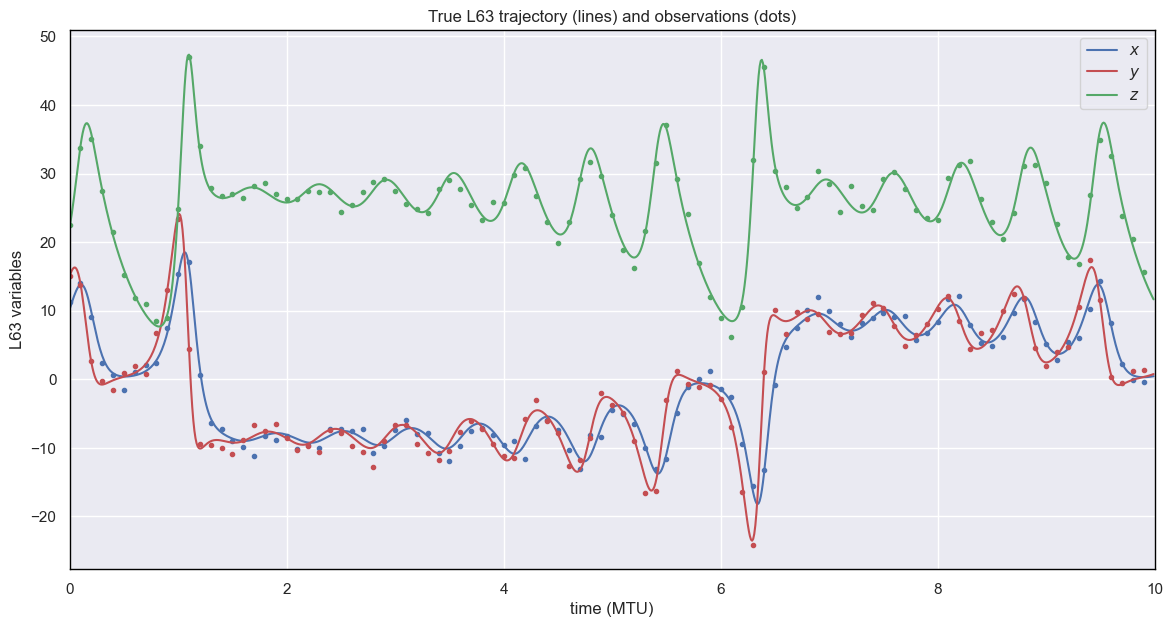

In [23]:
# Plot true L63 trajectory
t_plot = 10                         # number of MTU to plot
Nt_plot_t = int(t_plot/dt)          # corresponding number of time steps for the truth
Nt_plot_r = int(t_plot/dt/Nt_shift) # corresponding number of time steps for the raw data
sub_palette = [
    palette[0],
    palette[3],
    palette[2],
]                                   # select our favorite colors inside the palette
fig = plt.figure(figsize=(14, 7))
for (n, variable) in enumerate('xyz'):
    plt.plot(
        dt*np.arange(Nt_plot_t), 
        x_truth[:Nt_plot_t, n], 
        label='${}$'.format(variable),
        c=sub_palette[n],
    )
    plt.plot(
        dt*Nt_shift*np.arange(Nt_plot_r), 
        x_raw[:Nt_plot_r, n], 
        '.',
        c = sub_palette[n],
    )
plt.xlabel('time (MTU)')
plt.ylabel('L63 variables')
plt.title('True L63 trajectory (lines) and observations (dots)')
plt.xlim(0, t_plot)
plt.legend()
plt.show()

### <span style="color:blue"> The loss function </span>

In order to learn some optimal weights and biases of the NN, ${\mathcal N}({\color{red}{\boldsymbol{\omega}}}, \cdot)$, we would like to define then minimise the loss function (mean square error or __mse__)
$$
{\mathcal L}({\color{red}{\boldsymbol{\omega}}}) = \frac{1}{N_s}\sum_{i=1}^{N_s} \left\|\mathbf{y}_i-\mathcal{N} \left({\color{red}{\boldsymbol{\omega}}}, \mathbf{x}_i\right)\right\|^2.
$$
To implement this optimisation program, we need to set the parameters of the model training, such as the choice of the minimisation method and the related hyperparameters.
To do so, the model must be __compiled__:

In [18]:
opt = tf.keras.optimizers.Adam(learning_rate=5e-3)
model.compile(optimizer=opt, loss="mse", metrics=["mae"])

where we choose the __Adam__ minimisation method (a __stochastic gradient__ method), the mean square error (__mse__) loss, and choose for the validation a different metric, the mean absolute error (__mae__):
$$
{\mathcal V}({\mathcal N }) = \frac{1}{N_s} \sum_{i=1}^{N_s}\sum_{n=1}^{N_x} \left|[\mathbf{y}_i]_n-\left[\mathcal{N} \left(\mathbf{x}_i\right)\right]_n\right|.
$$
Now, we can run the training using the Keras `fit()` method. Besides the input and output vectors, we can specifiy the number of iterations of the minimisation, `num_epochs`, which is the number of __epochs__.
To do so, we can also specify the `batch_size` which tells how many samples are samples are used at once in the miminisation, and we also provide the validation dataset for cross-validation.

### <span style="color:blue"> The training of the NN surrogate model </span>

In [19]:
num_epochs = 256
callback = [ tqdm_callback(num_epochs, 'NN training') ]
history = model.fit(x_train, y_train,
          epochs=num_epochs,
          batch_size=64, 
          validation_data=(x_valid, y_valid),
          verbose=0,
          callbacks=callback)

NN training:   0%|          | 0/256 [00:00<?, ?it/s]

### <span style="color:blue"> Plotting the training and validation loss as a function of the epoch </span>

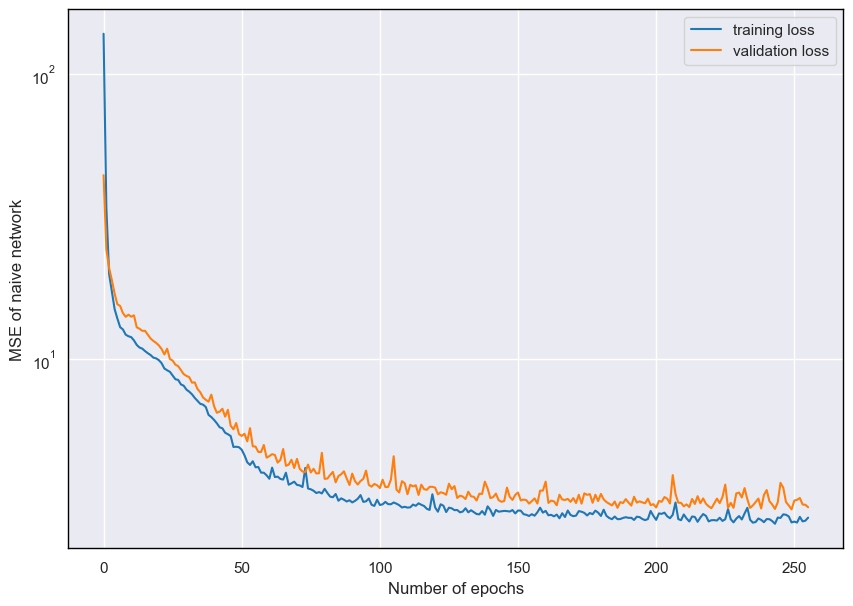

In [20]:
# Plot training and validation loss
fig = plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('MSE of naive network')
plt.yscale('log')
plt.legend()
plt.savefig('Figures/learning_curve')

Testing the surrogate model ${\mathcal N}({\color{red}{\boldsymbol{\omega}}}, \cdot)$ will be described in the second part of this lecture. However, for now, we can observe that after the initial drops of the loss function, say before $50$ epochs, the validation loss remains close to the training loss. This suggests that the surrogate model is not prone to overfitting, and that it may generalise well.